## Contexto

Este notebook foi criado como parte do projeto final do Módulo 4 do curso Vamo AI. Nele, faremos a análise exploratória de dados disponibilizados pela Câmara dos Deputados do Brasil. Estes dados compreendem o uso da CEAP (Cota de Exercício da Atividade Parlamentar) no período de 2009 a 2019 pelos Deputados Federais.
A descrição de cada uma das colunas pode ser encontrada [no site da Câmara dos Deputados](https://www2.camara.leg.br/transparencia/cota-para-exercicio-da-atividade-parlamentar/explicacoes-sobre-o-formato-dos-arquivos-xml).

In [38]:
import pandas as pd
import matplotlib as plt

In [39]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [40]:
df=pd.read_csv('/content/drive/MyDrive/dados_colab/cota-parlamentar.csv', sep=',') #depois de analisar, podemos importar só as colunas usadas.

In [41]:
df.sort_values(by='vlrliquido',ascending=False).head(4) #maiores reembolsos.

,codlegislatura,datemissao,idedocumento,idecadastro,indtipodocumento,nucarteiraparlamentar,nudeputadoid,nulegislatura,numano,numespecificacaosubcota,numlote,nummes,numparcela,numressarcimento,numsubcota,sgpartido,sguf,txnomeparlamentar,txtcnpjcpf,txtdescricao,txtdescricaoespecificacao,txtfornecedor,txtnumero,txtpassageiro,txttrecho,vlrdocumento,vlrglosa,vlrliquido,vlrrestituicao
60833,54,2012-12-14 00:00:00,2450977,73434.0,0,337.0,292,2011,2012,0,655008,12,0,NaN,5,PTB,SP,ARNALDO FARIA DE SÁ,5511195000158,DIVULGAÇÃO DA ATIVIDADE PARLAMENTAR.,NaN,BALCOLOR DIGITAL ATELIER GRAFICO LTDA,00000616,NaN,NaN,215000.0,0.0,215000.0,NaN
87402,54,2014-12-19 00:00:00,5578026,73434.0,0,337.0,292,2011,2014,0,1159723,12,0,NaN,5,PTB,SP,ARNALDO FARIA DE SÁ,54450705000130,DIVULGAÇÃO DA ATIVIDADE PARLAMENTAR.,NaN,GRÁFICA TRÊS PONTAS,00011536,NaN,NaN,208320.0,0.0,208320.0,NaN
70032,54,2013-12-27 00:00:00,5308289,73434.0,0,337.0,292,2011,2013,0,1083055,12,0,NaN,5,PTB,SP,ARNALDO FARIA DE SÁ,5511195000158,DIVULGAÇÃO DA ATIVIDADE PARLAMENTAR.,NaN,BALCOLOR DIGITAL ATELIER GRAFICO LTDA,00000769,NaN,NaN,197370.0,0.0,197370.0,NaN
113778,54,2011-12-19 00:00:00,2228012,73434.0,0,337.0,292,2011,2011,0,584828,12,0,NaN,5,PTB,SP,ARNALDO FARIA DE SÁ,5511195000158,DIVULGAÇÃO DA ATIVIDADE PARLAMENTAR.,NaN,BALCOLOR,00000068,NaN,NaN,197000.0,0.0,197000.0,NaN


In [42]:
df.columns #nome de cada coluna

Index(['codlegislatura', 'datemissao', 'idedocumento', 'idecadastro',
       'indtipodocumento', 'nucarteiraparlamentar', 'nudeputadoid',
       'nulegislatura', 'numano', 'numespecificacaosubcota', 'numlote',
       'nummes', 'numparcela', 'numressarcimento', 'numsubcota', 'sgpartido',
       'sguf', 'txnomeparlamentar', 'txtcnpjcpf', 'txtdescricao',
       'txtdescricaoespecificacao', 'txtfornecedor', 'txtnumero',
       'txtpassageiro', 'txttrecho', 'vlrdocumento', 'vlrglosa', 'vlrliquido',
       'vlrrestituicao'],
      dtype='object')

In [43]:
cols = ['txnomeparlamentar', 'sguf', 'sgpartido','txtdescricao', 'vlrliquido', 'nummes', 'numano', 'txtfornecedor'] #usar essas colunas na análise

In [44]:
df=pd.read_csv('drive/MyDrive/dados_colab/cota-parlamentar.csv', usecols=cols,sep=',') #df que será usado.

In [45]:
df.head()

,numano,nummes,sgpartido,sguf,txnomeparlamentar,txtdescricao,txtfornecedor,vlrliquido
0,2020,2,PSDB,NaN,LIDERANÇA DO PSDB,DIVULGAÇÃO DA ATIVIDADE PARLAMENTAR.,CONTENT ASSESSORIA LTDA - ME,998.0
1,2020,1,PSDB,NaN,LIDERANÇA DO PSDB,DIVULGAÇÃO DA ATIVIDADE PARLAMENTAR.,METROPOLE INTERATIVA INFORMATICA LTDA,4920.0
2,2020,2,PSDB,NaN,LIDERANÇA DO PSDB,FORNECIMENTO DE ALIMENTAÇÃO DO PARLAMENTAR,AFC ALIMENTOS LTDA,511.0
3,2020,2,PSDB,NaN,LIDERANÇA DO PSDB,FORNECIMENTO DE ALIMENTAÇÃO DO PARLAMENTAR,AFC ALIMENTOS LTDA,186.0
4,2020,2,PSDB,NaN,LIDERANÇA DO PSDB,FORNECIMENTO DE ALIMENTAÇÃO DO PARLAMENTAR,ARTESANAL SERVICOS DE ALIMENTACAO E BUFFET EIRELI,740.0


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3855649 entries, 0 to 3855648
Data columns (total 8 columns):
 #   Column             Dtype  
---  ------             -----  
 0   numano             int64  
 1   nummes             int64  
 2   sgpartido          object 
 3   sguf               object 
 4   txnomeparlamentar  object 
 5   txtdescricao       object 
 6   txtfornecedor      object 
 7   vlrliquido         float64
dtypes: float64(1), int64(2), object(5)
memory usage: 235.3+ MB


In [47]:
df.head()

,numano,nummes,sgpartido,sguf,txnomeparlamentar,txtdescricao,txtfornecedor,vlrliquido
0,2020,2,PSDB,NaN,LIDERANÇA DO PSDB,DIVULGAÇÃO DA ATIVIDADE PARLAMENTAR.,CONTENT ASSESSORIA LTDA - ME,998.0
1,2020,1,PSDB,NaN,LIDERANÇA DO PSDB,DIVULGAÇÃO DA ATIVIDADE PARLAMENTAR.,METROPOLE INTERATIVA INFORMATICA LTDA,4920.0
2,2020,2,PSDB,NaN,LIDERANÇA DO PSDB,FORNECIMENTO DE ALIMENTAÇÃO DO PARLAMENTAR,AFC ALIMENTOS LTDA,511.0
3,2020,2,PSDB,NaN,LIDERANÇA DO PSDB,FORNECIMENTO DE ALIMENTAÇÃO DO PARLAMENTAR,AFC ALIMENTOS LTDA,186.0
4,2020,2,PSDB,NaN,LIDERANÇA DO PSDB,FORNECIMENTO DE ALIMENTAÇÃO DO PARLAMENTAR,ARTESANAL SERVICOS DE ALIMENTACAO E BUFFET EIRELI,740.0


In [48]:
df.rename(columns={'sguf': 'UF', 'sgpartido': 'partido', 'txnomeparlamentar': 'nome_parlamentar', 'txtdescricao': 'desc_gasto', 'vlrliquido': 'valor_gasto', 'nummes': 'mes', 'numano': 'ano'}, inplace=True) 

In [49]:
df.head() #conferindo as alteraçoes de nomes de coluna

,ano,mes,partido,UF,nome_parlamentar,desc_gasto,txtfornecedor,valor_gasto
0,2020,2,PSDB,NaN,LIDERANÇA DO PSDB,DIVULGAÇÃO DA ATIVIDADE PARLAMENTAR.,CONTENT ASSESSORIA LTDA - ME,998.0
1,2020,1,PSDB,NaN,LIDERANÇA DO PSDB,DIVULGAÇÃO DA ATIVIDADE PARLAMENTAR.,METROPOLE INTERATIVA INFORMATICA LTDA,4920.0
2,2020,2,PSDB,NaN,LIDERANÇA DO PSDB,FORNECIMENTO DE ALIMENTAÇÃO DO PARLAMENTAR,AFC ALIMENTOS LTDA,511.0
3,2020,2,PSDB,NaN,LIDERANÇA DO PSDB,FORNECIMENTO DE ALIMENTAÇÃO DO PARLAMENTAR,AFC ALIMENTOS LTDA,186.0
4,2020,2,PSDB,NaN,LIDERANÇA DO PSDB,FORNECIMENTO DE ALIMENTAÇÃO DO PARLAMENTAR,ARTESANAL SERVICOS DE ALIMENTACAO E BUFFET EIRELI,740.0


In [50]:
df.tail() #conferindo os valores finais da tabela

,ano,mes,partido,UF,nome_parlamentar,desc_gasto,txtfornecedor,valor_gasto
3855644,2015,12,MDB,RJ,WILSON BESERRA,Emissão Bilhete Aéreo,Cia Aérea - AVIANCA,592.45
3855645,2015,12,MDB,RJ,WILSON BESERRA,Emissão Bilhete Aéreo,Cia Aérea - AVIANCA,1324.83
3855646,2015,12,MDB,RJ,WILSON BESERRA,Emissão Bilhete Aéreo,Cia Aérea - AVIANCA,-1194.93
3855647,2015,12,MDB,RJ,WILSON BESERRA,Emissão Bilhete Aéreo,Cia Aérea - AVIANCA,-469.05
3855648,2015,12,PSD,RJ,NELSON NAHIM,TELEFONIA,RAMAL,9.85


In [51]:
df["desc_gasto"].unique() #verificando os diferentes tipos de gastos realizados pelos Deputados.

array(['DIVULGAÇÃO DA ATIVIDADE PARLAMENTAR.',
       'FORNECIMENTO DE ALIMENTAÇÃO DO PARLAMENTAR',
       'MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE PARLAMENTAR',
       'COMBUSTÍVEIS E LUBRIFICANTES.', 'PASSAGENS AÉREAS', 'TELEFONIA',
       'LOCAÇÃO OU FRETAMENTO DE VEÍCULOS AUTOMOTORES',
       'SERVIÇOS POSTAIS',
       'CONSULTORIAS, PESQUISAS E TRABALHOS TÉCNICOS.',
       'SERVIÇO DE SEGURANÇA PRESTADO POR EMPRESA ESPECIALIZADA.',
       'Emissão Bilhete Aéreo',
       'HOSPEDAGEM ,EXCETO DO PARLAMENTAR NO DISTRITO FEDERAL.',
       'SERVIÇO DE TÁXI, PEDÁGIO E ESTACIONAMENTO',
       'PARTICIPAÇÃO EM CURSO, PALESTRA OU EVENTO SIMILAR',
       'LOCAÇÃO OU FRETAMENTO DE AERONAVES',
       'PASSAGENS TERRESTRES, MARÍTIMAS OU FLUVIAIS',
       'ASSINATURA DE PUBLICAÇÕES',
       'LOCAÇÃO DE VEÍCULOS AUTOMOTORES OU FRETAMENTO DE EMBARCAÇÕES',
       'LOCAÇÃO OU FRETAMENTO DE EMBARCAÇÕES',
       'LOCOMOÇÃO, ALIMENTAÇÃO E  HOSPEDAGEM',
       'AQUISIÇÃO DE MATERIAL DE ESCRITÓRIO.

In [52]:
df.isnull().sum() #verificando se há valores nulos.

ano                    0
mes                    0
partido                0
UF                  5505
nome_parlamentar       0
desc_gasto             0
txtfornecedor          9
valor_gasto            0
dtype: int64

In [53]:
df.UF.fillna('Sem informação', inplace=True) #substituindo valores nulos por "Sem informação"

In [54]:
df.isnull().sum() #conferindo se funcionou

ano                 0
mes                 0
partido             0
UF                  0
nome_parlamentar    0
desc_gasto          0
txtfornecedor       9
valor_gasto         0
dtype: int64

In [55]:
data = df.mes.astype(str) + "-" + df.ano.astype(str) 
data = pd.DatetimeIndex(data) # para criar séries ao longo do tempo, devemos criar uma nova coluna no formato datetime a partir de mês/ano.

In [56]:
df['data'] = data
df.head() #conferindo

,ano,mes,partido,UF,nome_parlamentar,desc_gasto,txtfornecedor,valor_gasto,data
0,2020,2,PSDB,Sem informação,LIDERANÇA DO PSDB,DIVULGAÇÃO DA ATIVIDADE PARLAMENTAR.,CONTENT ASSESSORIA LTDA - ME,998.0,2020-02-01
1,2020,1,PSDB,Sem informação,LIDERANÇA DO PSDB,DIVULGAÇÃO DA ATIVIDADE PARLAMENTAR.,METROPOLE INTERATIVA INFORMATICA LTDA,4920.0,2020-01-01
2,2020,2,PSDB,Sem informação,LIDERANÇA DO PSDB,FORNECIMENTO DE ALIMENTAÇÃO DO PARLAMENTAR,AFC ALIMENTOS LTDA,511.0,2020-02-01
3,2020,2,PSDB,Sem informação,LIDERANÇA DO PSDB,FORNECIMENTO DE ALIMENTAÇÃO DO PARLAMENTAR,AFC ALIMENTOS LTDA,186.0,2020-02-01
4,2020,2,PSDB,Sem informação,LIDERANÇA DO PSDB,FORNECIMENTO DE ALIMENTAÇÃO DO PARLAMENTAR,ARTESANAL SERVICOS DE ALIMENTACAO E BUFFET EIRELI,740.0,2020-02-01


### Análise Exploratória

Aqui, faremos a exploração dos dados para responder as seguintes perguntas:

1. Total gasto por categoria;

2. Valores gastos por ano.

3. Qual parlamentar mais gastou neste período?

4. Qual parlamentar menos gastou neste período?

5. Deputados que mais gastaram em média.

6. Gastos totais por estado.

7. Quem pediu o maior reembolso de uma só vez?



In [57]:
gastos = df.groupby('desc_gasto')['valor_gasto'].sum().sort_values(ascending=False).head(10) #gastos por atividade

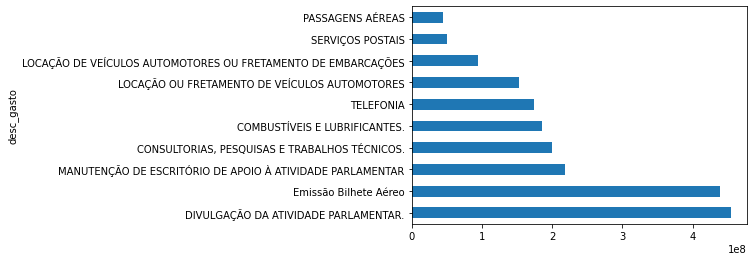

In [58]:

gastos.plot.barh();

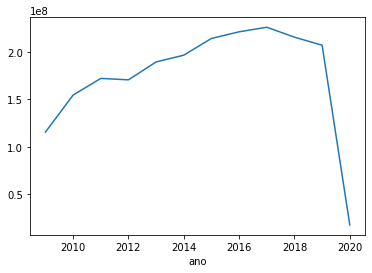

In [59]:
gastos_ano = df.groupby('ano')['valor_gasto'].sum()
gastos_ano.plot(kind='line');

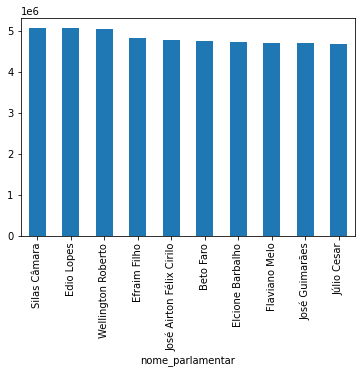

In [60]:
gastos_nome = df.groupby(['nome_parlamentar'])['valor_gasto'].sum().sort_values(ascending=False).head(10)
gastos_nome.plot(kind='bar');

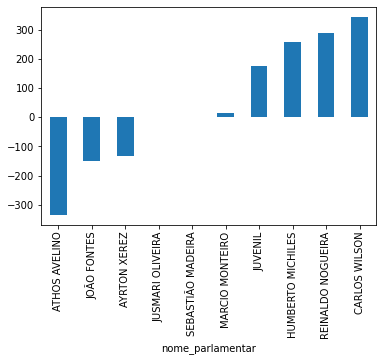

In [61]:
gastos_menores_nome = df.groupby(['nome_parlamentar'])['valor_gasto'].sum().sort_values().head(10)
gastos_menores_nome.plot(kind='bar') #Valores negativos são bilhetes de compensação.

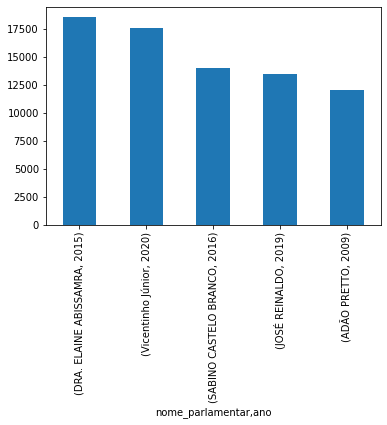

In [62]:
gasto_medio = df.groupby(['nome_parlamentar', 'ano'])['valor_gasto'].mean().sort_values(ascending=False).head(5)
gasto_medio.plot(kind='bar');

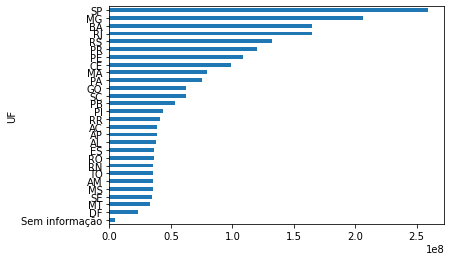

In [63]:
gasto_estado = df.groupby('UF')['valor_gasto'].sum().sort_values()
gasto_estado.plot(kind='barh');

In [64]:
df.sort_values(by='valor_gasto',ascending=False) #maiores reembolsos de uma só vez.

,ano,mes,partido,UF,nome_parlamentar,desc_gasto,txtfornecedor,valor_gasto,data
60833,2012,12,PTB,SP,ARNALDO FARIA DE SÁ,DIVULGAÇÃO DA ATIVIDADE PARLAMENTAR.,BALCOLOR DIGITAL ATELIER GRAFICO LTDA,215000.00,2012-12-01
87402,2014,12,PTB,SP,ARNALDO FARIA DE SÁ,DIVULGAÇÃO DA ATIVIDADE PARLAMENTAR.,GRÁFICA TRÊS PONTAS,208320.00,2014-12-01
70032,2013,12,PTB,SP,ARNALDO FARIA DE SÁ,DIVULGAÇÃO DA ATIVIDADE PARLAMENTAR.,BALCOLOR DIGITAL ATELIER GRAFICO LTDA,197370.00,2013-12-01
113778,2011,12,PTB,SP,ARNALDO FARIA DE SÁ,DIVULGAÇÃO DA ATIVIDADE PARLAMENTAR.,BALCOLOR,197000.00,2011-12-01
110908,2011,12,PT,SP,Arlindo Chinaglia,DIVULGAÇÃO DA ATIVIDADE PARLAMENTAR.,ALL WIN PROPAGANDA LTDA,194100.00,2011-12-01
...,...,...,...,...,...,...,...,...,...
3050292,2012,12,PMDB,RJ,ADRIAN,Emissão Bilhete Aéreo,Cia Aérea - TAM,-7809.77,2012-12-01
2646150,2015,9,PT,AC,SIBÁ MACHADO,Emissão Bilhete Aéreo,Cia Aérea - TAM,-9240.77,2015-09-01
1499994,2011,10,PMDB,MG,NEWTON CARDOSO,Emissão Bilhete Aéreo,Cia Aérea - TAM,-10466.70,2011-10-01
3050291,2012,12,PMDB,RJ,ADRIAN,Emissão Bilhete Aéreo,Cia Aérea - TAM,-12561.10,2012-12-01


In [67]:
df.sort_values(by='valor_gasto', ascending=False).head(4)


,ano,mes,partido,UF,nome_parlamentar,desc_gasto,txtfornecedor,valor_gasto,data
60833,2012,12,PTB,SP,ARNALDO FARIA DE SÁ,DIVULGAÇÃO DA ATIVIDADE PARLAMENTAR.,BALCOLOR DIGITAL ATELIER GRAFICO LTDA,215000.0,2012-12-01
87402,2014,12,PTB,SP,ARNALDO FARIA DE SÁ,DIVULGAÇÃO DA ATIVIDADE PARLAMENTAR.,GRÁFICA TRÊS PONTAS,208320.0,2014-12-01
70032,2013,12,PTB,SP,ARNALDO FARIA DE SÁ,DIVULGAÇÃO DA ATIVIDADE PARLAMENTAR.,BALCOLOR DIGITAL ATELIER GRAFICO LTDA,197370.0,2013-12-01
113778,2011,12,PTB,SP,ARNALDO FARIA DE SÁ,DIVULGAÇÃO DA ATIVIDADE PARLAMENTAR.,BALCOLOR,197000.0,2011-12-01


In [68]:
df.to_csv('newcota.csv')
!cp newcota.csv "/content/drive/MyDrive/dados_colab"